In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("/kaggle/input/corporate-energy-consumption-data/Corporate_Energy_Consumption_20240402.csv", low_memory=False)

In [108]:
df.head(15)

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jan,1883,kWh
1,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Feb,2320,kWh
2,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Mar,1657,kWh
3,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Apr,1107,kWh
4,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,May,972,kWh
5,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jun,782,kWh
6,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jul,909,kWh
7,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Aug,1130,kWh
8,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Sep,1170,kWh
9,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Oct,1419,kWh


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Business Unit Desc  373989 non-null  object
 1   FacilityName        373872 non-null  object
 2   Site ID             373989 non-null  object
 3   FacilityAddress     373826 non-null  object
 4   Energy Description  373989 non-null  object
 5   Year                373989 non-null  int64 
 6   Month               373989 non-null  object
 7   Total Consumption   373989 non-null  int64 
 8   Unit                373989 non-null  object
dtypes: int64(2), object(7)
memory usage: 25.7+ MB


In [110]:
df.isnull().sum()

Business Unit Desc      0
FacilityName          117
Site ID                 0
FacilityAddress       163
Energy Description      0
Year                    0
Month                   0
Total Consumption       0
Unit                    0
dtype: int64

In [111]:
df['FacilityName']=df['FacilityName'].fillna('Unknown Facility')
df['FacilityAddress']=df['FacilityAddress'].fillna('Location Unknown')

In [112]:
df.isnull().sum()

Business Unit Desc    0
FacilityName          0
Site ID               0
FacilityAddress       0
Energy Description    0
Year                  0
Month                 0
Total Consumption     0
Unit                  0
dtype: int64

In [113]:
yearly_emissions=df.groupby('Year')['Total Consumption'].sum().reset_index()

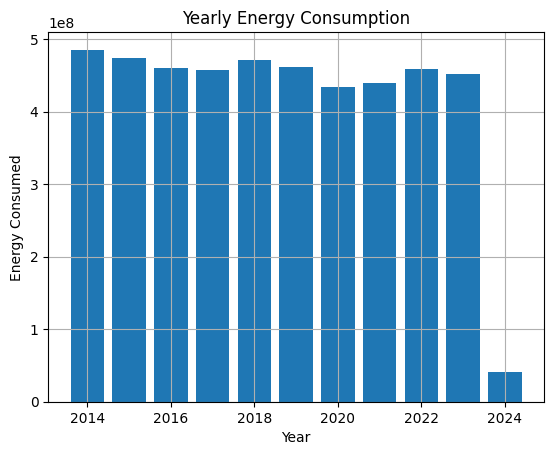

In [114]:
plt.bar(yearly_emissions['Year'], yearly_emissions['Total Consumption'])
plt.xlabel('Year')
plt.ylabel('Energy Consumed')
plt.title('Yearly Energy Consumption')
plt.grid(True)
plt.show()


In [115]:
company_emissions_top10=df.groupby('FacilityName')['Total Consumption'].sum().nlargest(10).reset_index()

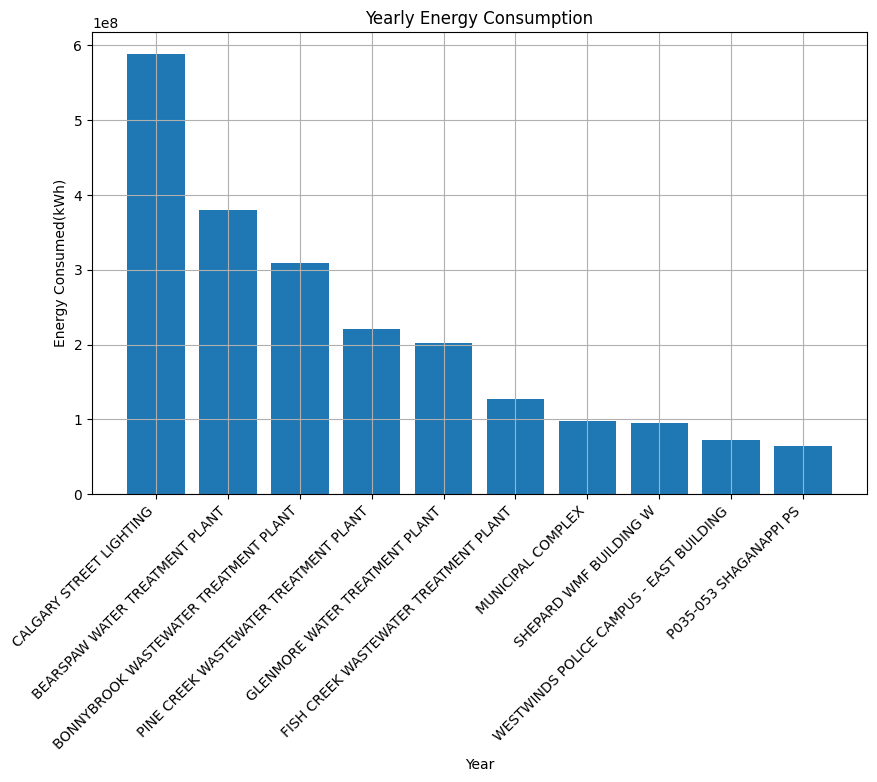

In [116]:
plt.figure(figsize=(10,6))
plt.bar(company_emissions_top10['FacilityName'],company_emissions_top10['Total Consumption'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Year')
plt.ylabel('Energy Consumed(kWh)')
plt.title('Yearly Energy Consumption')
plt.grid(True)
plt.show()

In [117]:
df['CO2e/kWh']=(df['Total Consumption']/100)*0.09
#this is the estimated emissions per kWh energy consumed. The value has been taken from 
#https://ourworldindata.org/grapher/carbon-intensity-electricity#:~:text=Carbon%20intensity%20is%20measured%20in,kilowatt%2Dhour%20of%20electricitygenerated.


#This calculation is based on the following estimations:
#According to the calculator online, 100kWh releases 0.09 tons of CO2e
#Thus, if the emission is divided by 100 and multiplied by 0.09, we get tons of CO2e
df.head()

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit,CO2e/kWh
0,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jan,1883,kWh,1.6947
1,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Feb,2320,kWh,2.0880
2,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Mar,1657,kWh,1.4913
3,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Apr,1107,kWh,0.9963
4,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,May,972,kWh,0.8748


In [118]:
df=df[df['Year'] != 2024]
emissions_yearly=df.groupby('Year')['CO2e/kWh'].sum().reset_index()


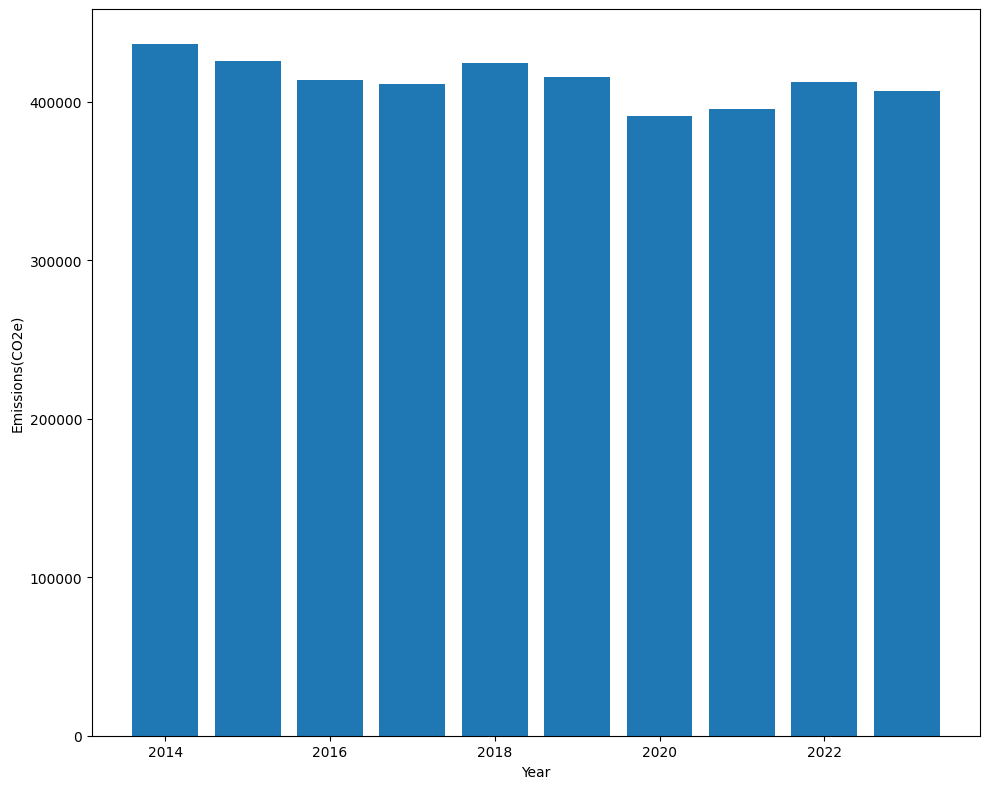

In [119]:
plt.figure(figsize=(10,8))
plt.bar(emissions_yearly['Year'],emissions_yearly['CO2e/kWh'])
#plt.xticks(rotation=45,ha='right')
plt.xlabel('Year')
plt.ylabel('Emissions(CO2e)')
plt.tight_layout()
plt.show()

# Year on Year Change in Emissions


In [120]:
emissions_yearly['YoY Change']=emissions_yearly['CO2e/kWh'].pct_change()*100
emissions_yearly

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Year,CO2e/kWh,YoY Change
0,2014,436840.1298,NaN
1,2015,426137.0211,-2.450120
2,2016,414073.4652,-2.830910
3,2017,411088.4145,-0.720899
4,2018,424374.3108,3.231883
5,2019,415953.6939,-1.984243
6,2020,391061.7630,-5.984303
7,2021,395735.3910,1.195112
8,2022,412564.0590,4.252505
9,2023,406984.6584,-1.352372


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


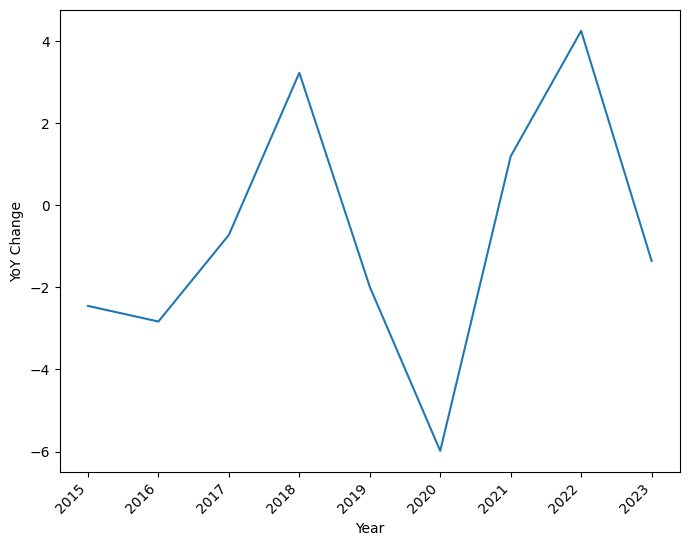

In [121]:
plt.figure(figsize=(8,6))
sns.lineplot(data=emissions_yearly, x='Year',y='YoY Change')
plt.xticks(rotation=45,ha='right')
plt.show()

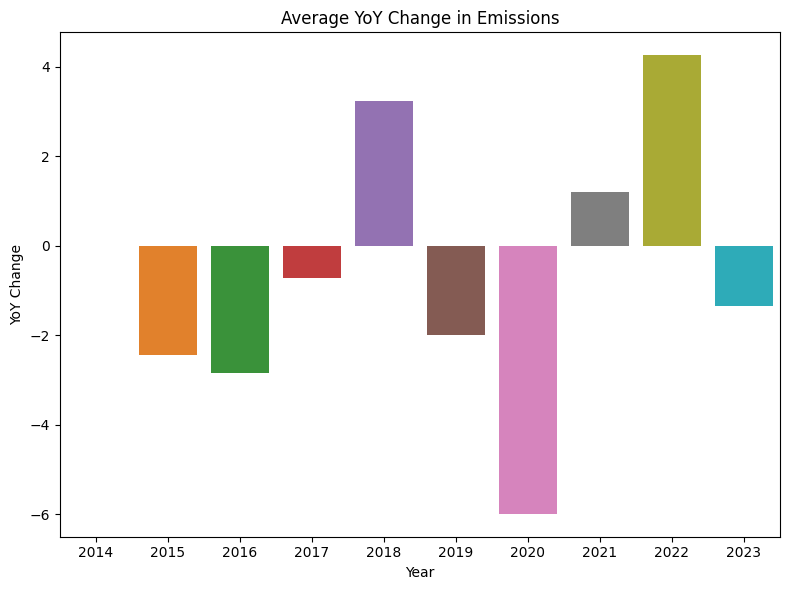

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(data=emissions_yearly, x='Year', y='YoY Change',estimator=np.mean)
plt.title('Average YoY Change in Emissions')
plt.tight_layout()
plt.show()

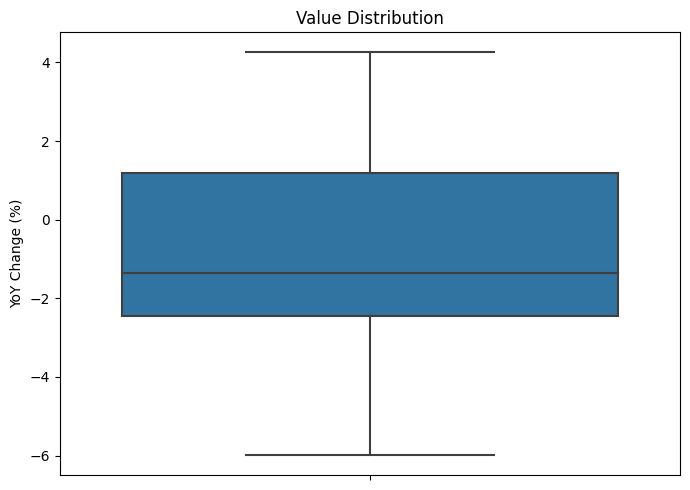

In [123]:
#Box Plot
emissions_yearly.dropna(subset=['YoY Change'])

plt.figure(figsize=(7,5))
sns.boxplot(y='YoY Change', data=emissions_yearly)
plt.title('Value Distribution')
plt.ylabel('YoY Change (%)')
plt.tight_layout()
plt.show()

In [124]:
df.head(2)

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit,CO2e/kWh
0,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Jan,1883,kWh,1.6947
1,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,6015 23 AV SE,Electricity,2014,Feb,2320,kWh,2.0880


In [125]:
energy_type=df.groupby(['Energy Description','Year'])['Total Consumption'].sum().reset_index()

piv_energy_type=energy_type.pivot(index='Year',columns='Energy Description',values='Total Consumption')
piv_energy_type

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Energy Description,District Energy,Electricity,Natural Gas,Solar Power,Solar Thermal
Year,,,,,
2014,61577.0,483479601.0,1832911.0,1895.0,1938.0
2015,49933.0,471737713.0,1655571.0,40566.0,1796.0
2016,51677.0,458218089.0,1635799.0,175138.0,925.0
2017,58205.0,454300797.0,1770481.0,634410.0,1012.0
2018,62885.0,467101281.0,1980687.0,2381307.0,852.0
2019,67471.0,456986332.0,2408760.0,2707849.0,359.0
2020,60907.0,425302857.0,2283719.0,6865587.0,0.0
2021,64066.0,431726312.0,2244604.0,5671008.0,NaN
2022,67379.0,449778952.0,2290822.0,6267357.0,NaN


<Figure size 1200x1000 with 0 Axes>

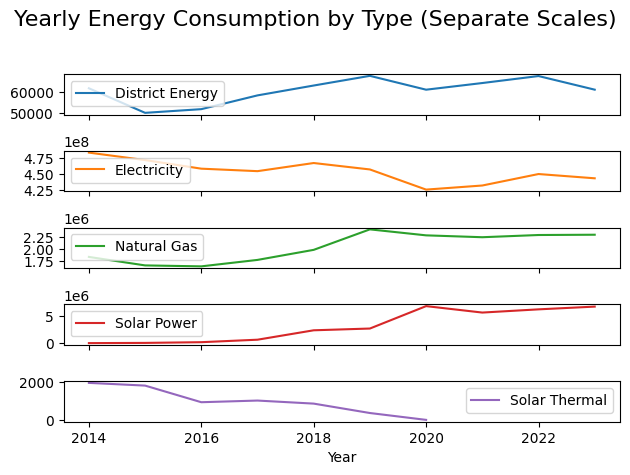

In [126]:
# plt.figure(figsize=(12,10)) 
# piv_energy_type.plot(kind='scatter')
# plt.xlabel('Year')
# plt.ylabel('Total Consumption')
# plt.xticks(rotation=0)
# plt.legend(title='Energy Types')
# plt.show()

#the problem with a normal visualisation is that the distribution of values is dominated by one particular energy type, thus, I am trying to calculate each energy type and 
#its consumption. 

plt.figure(figsize=(12,10))
piv_energy_type.plot(subplots=True, layout=(len(piv_energy_type.columns),1),sharey=False)
plt.suptitle('Yearly Energy Consumption by Type (Separate Scales)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Rolling 3-Month Average Energy Consumption


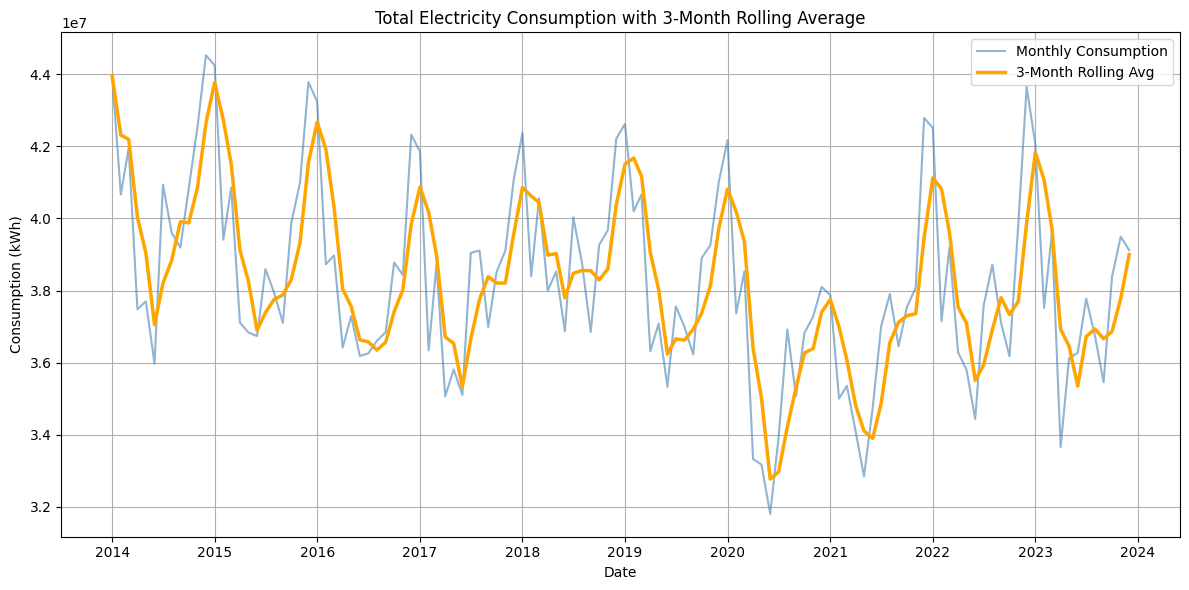

In [127]:
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month_Num'] = df['Month'].map(month_map)

df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month_Num'], day=1))

# df_sorted=df.sort_values('Date').reset_index(drop=True)

# df_sorted['Rolling_Mean'] = df_sorted['Total Consumption'].rolling(window=3, min_periods=1).mean()

# # plt.figure(figsize=(12,6))
# # plt.plot(df_sorted['Date'], df_sorted['Total Consumption'], 
# #          color='steelblue', alpha=0.3, label='Monthly Consumption')

# # plt.plot(df_sorted['Date'], df_sorted['Rolling_Mean'],
# #          color='orange', linewidth=2.5, label='3-Month Rolling Avg')

# # plt.title('Electricity Consumption with 3-Month Rolling Average')
# # plt.xlabel('Date')
# # plt.ylabel('Consumption (kWh)')
# # plt.legend()
# # plt.grid(True)
# # plt.tight_layout()
# # plt.show()

# df_sorted.head(10)


df_monthly_sorted=df.groupby('Date')['Total Consumption'].sum().reset_index()

df_monthly_sorted['Rolling_Mean']=df_monthly_sorted['Total Consumption'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(12, 6))

plt.plot(df_monthly_sorted['Date'], df_monthly_sorted['Total Consumption'], 
         color='steelblue', alpha=0.6, label='Monthly Consumption')

plt.plot(df_monthly_sorted['Date'], df_monthly_sorted['Rolling_Mean'], 
         color='orange', linewidth=2.5, label='3-Month Rolling Avg')

plt.title('Total Electricity Consumption with 3-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The trend shows that during the winter times, the consumption of energy goes to the maximum level, following a drop in energy consumption in the summer time. The energy consumption, over the years, shows reduced consumption in energy. 



# Plotting Time Series for Natural Gas

In [128]:
natural_gas=df[df['Energy Description']=='Natural Gas']

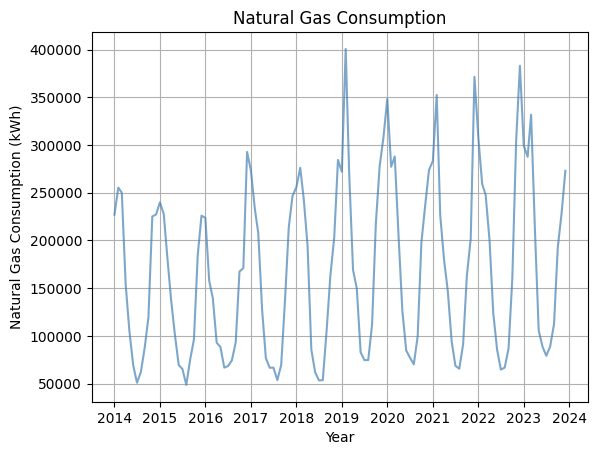

In [129]:
natural_gas_total=natural_gas.groupby('Date')['Total Consumption'].sum().reset_index()

plt.plot(natural_gas_total['Date'], natural_gas_total['Total Consumption'], color='steelblue', alpha=0.7, label='Monthly Consumption of Natural Gas')
plt.xlabel('Year')
plt.ylabel('Natural Gas Consumption (kWh)')
plt.title('Natural Gas Consumption')
plt.grid(True)
plt.tight_layout
plt.show()

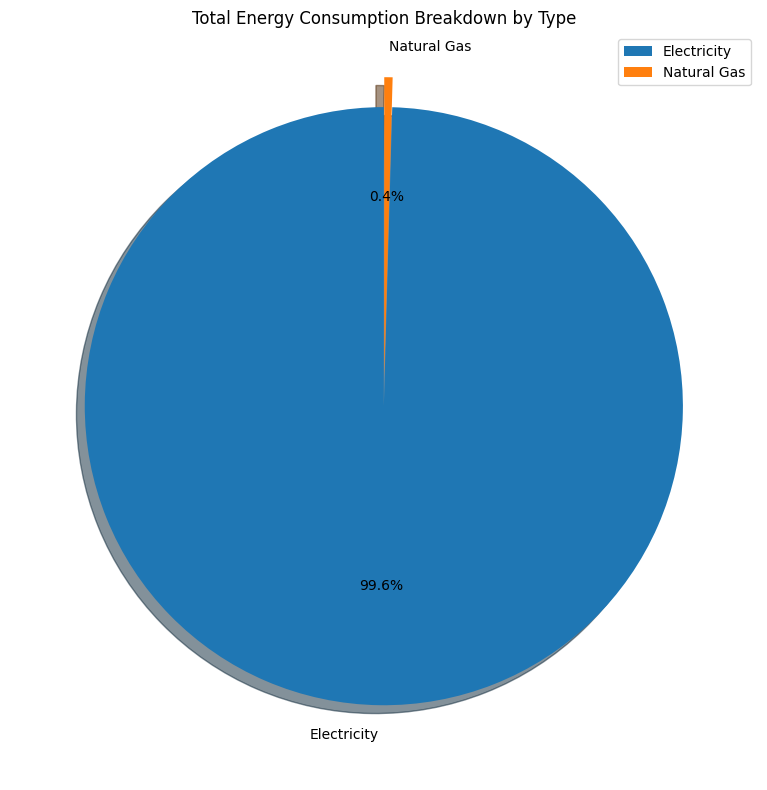

In [130]:
electricity = df[df['Energy Description']=='Electricity']
electricity_total=electricity.groupby('Date')['Total Consumption'].sum().reset_index()

electricity_total_value=electricity_total['Total Consumption'].sum()
natural_gas_total_value=natural_gas_total['Total Consumption'].sum()

total_energy_consumed=electricity_total_value+natural_gas_total_value
labels=['Total Energy Consumption']

prop_electricity=electricity_total_value/total_energy_consumed
prop_natural_gas=natural_gas_total_value/total_energy_consumed

sizes=[electricity_total_value, natural_gas_total_value]
labels=['Electricity','Natural Gas']

#Exploding Natural Gas since it is very small compared to Electricity
explode=(0,0.1)

plt.figure(figsize=(8,8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,startangle=90)

# plt.bar(labels,electricity_total_value,label='Electricity')
# plt.bar(labels,natural_gas_total_value,bottom=electricity_total_value,label='Natural gas')
# plt.ylabel('Consumption (kWh)')
plt.title('Total Energy Consumption Breakdown by Type')
plt.legend()
plt.tight_layout()
plt.show()

# Forecasting Emissions using Prophet

As per research, I had an option between ARIMA and Prophet. ARIMA would not fit well with my dataset because it exhibits a lot of seasonality. On the other hand, Prophet would fit well with the dataset. 


In [131]:
from prophet import Prophet

In [ ]:
df['Energy Description'].unique()
df=df.rename(columns={'CO2e/kWh':'Emissions(CO2e)'})
df=df[df['Energy Description'].isin(['Natural Gas','Electricity','District Energy'])]

df_monthly_emissions=df.groupby('Date')['Emissions(CO2e)'].sum().reset_index()
df_prophet=df_monthly_emissions.rename(columns={'Date':'ds','Emissions(CO2e)':'y'})

#fitting the model
model=Prophet()
model.fit(df_prophet)
#creating dataframe for future dates, for the next 12 months
future_data=model.make_future_dataframe(periods=12, freq='MS')

#predicting future values
forecast=model.predict(future_data)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())